In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline


In [2]:
x=np.arange(-5.0 , 5.0 ,0.1)

##You can adjust the slope and intercept to verify the changes in the graph
y = 6 + 12*(x)
y_noise = 2* np.random.normal(size=x.size)
ydata = y + y_noise

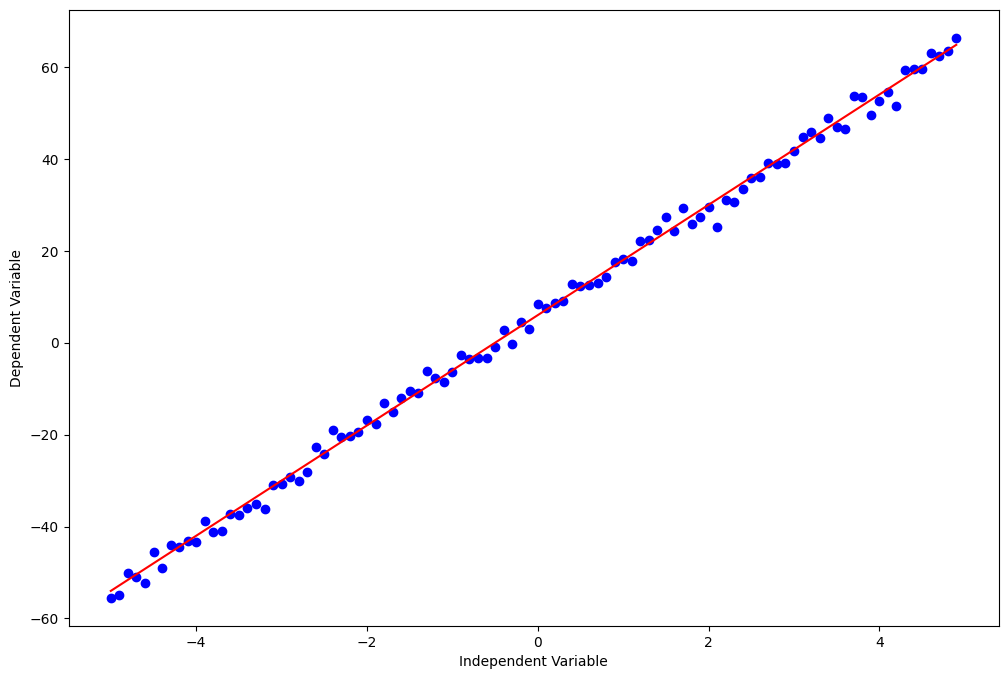

In [3]:
plt.figure(figsize=(12,8))
plt.plot(x,ydata, 'bo')
plt.plot(x,y, 'r')
plt.xlabel("Independent Variable")
plt.ylabel("Dependent Variable")
plt.show()

In [4]:
x=np.arange(-5.0 , 5.0 ,0.1)

y = 1*(x**3) + 1*(x**2) + 1*x + 3
y_noise = 20* np.random.normal(size=x.size)
ydata = y + y_noise

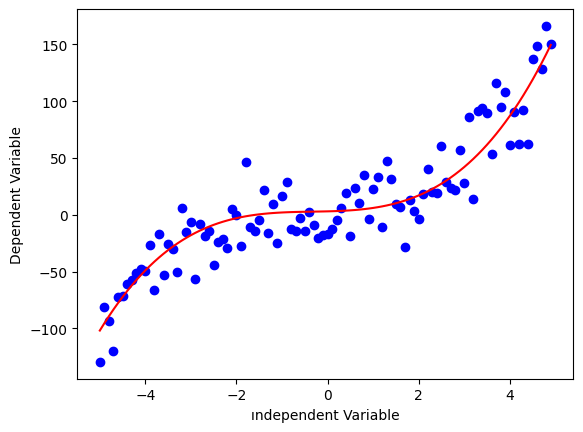

In [5]:
plt.plot(x,ydata, 'bo')
plt.plot(x,y, 'r')
plt.xlabel("ındependent Variable")
plt.ylabel("Dependent Variable")
plt.show()

## Quadratic

y= x^2

In [6]:
x=np.arange(-5.0 , 5.0 ,0.1)

y = np.power(x,2)
y_noise = 2* np.random.normal(size=x.size)
ydata = y + y_noise

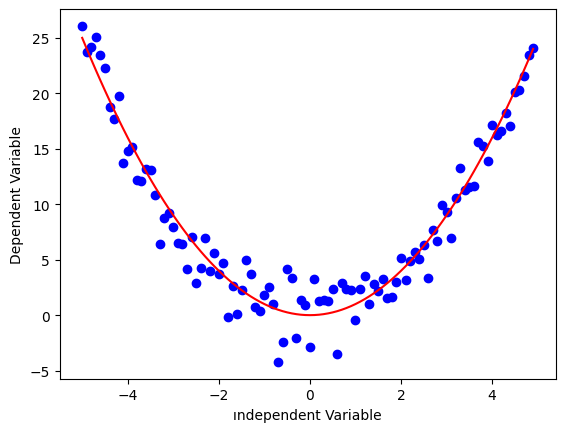

In [7]:
plt.plot(x,ydata, 'bo')
plt.plot(x,y, 'r')
plt.xlabel("ındependent Variable")
plt.ylabel("Dependent Variable")
plt.show()

## Exponential

Y= a + b c^x

In [8]:
X=np.arange(-5.0 , 5.0 ,0.1)

y = np.exp(X)
y_noise = 2* np.random.normal(size=x.size)
ydata = y + y_noise

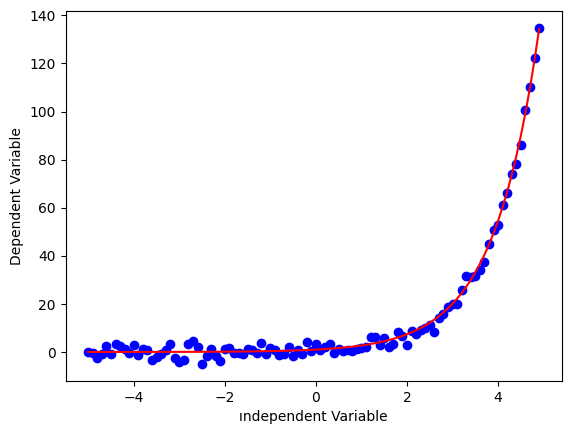

In [9]:
plt.plot(X,ydata, 'bo')
plt.plot(X,y, 'r')
plt.xlabel("ındependent Variable")
plt.ylabel("Dependent Variable")
plt.show()

## Logarithmic

y = log(x)

- Instead of x, we can use X, wgich can be o polynomical representation of x values.
y = log(X)

In [10]:
X=np.arange(1.0 , 5.0 ,0.1)

y = np.log(X)

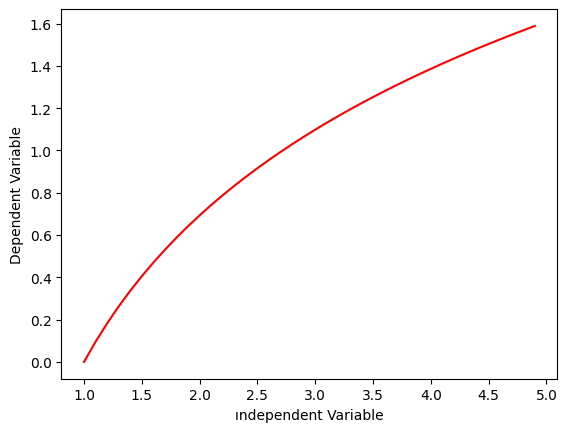

In [11]:
plt.plot(X,y, 'r')
plt.xlabel("ındependent Variable")
plt.ylabel("Dependent Variable")
plt.show()

## Logistic / Sigmoid

Y= a + (b / 1 + c^ (X-d))

In [12]:
X = np.arange(-5.0, 5.0, 0.1)

Y = 1-4/(1+np.power(3, X-2))

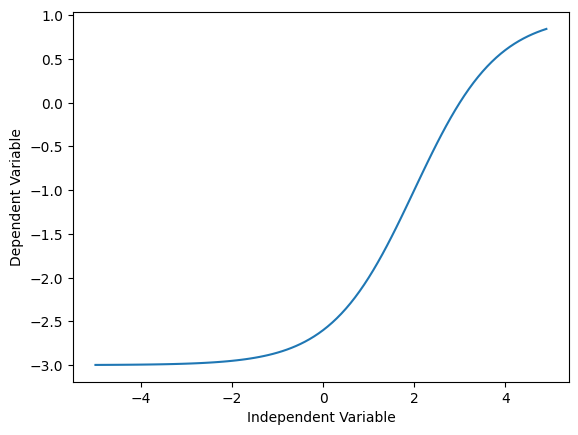

In [13]:
plt.plot(X,Y) 
plt.ylabel('Dependent Variable')
plt.xlabel('Independent Variable')
plt.show()

In [14]:
import pandas as pd

In [15]:
df = pd.read_csv("data/china_gdp.csv")

In [16]:
df.head(5)

,Year,Value
0,1960,5.918412e+10
1,1961,4.955705e+10
2,1962,4.668518e+10
3,1963,5.009730e+10
4,1964,5.906225e+10


In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55 entries, 0 to 54
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Year    55 non-null     int64  
 1   Value   55 non-null     float64
dtypes: float64(1), int64(1)
memory usage: 1008.0 bytes


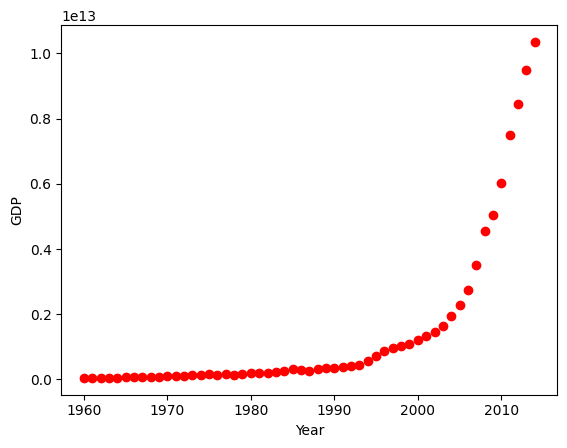

In [18]:
x_data, y_data = df["Year"].values, df["Value"].values
plt.plot(x_data, y_data, "ro")
plt.ylabel("GDP")
plt.xlabel("Year")
plt.show()


## Practice 

1- Choose a model for data set. Which one will be best fit?
 - Exponential
 - Sigmoid

 2- Calculate what is the accuracy of your model

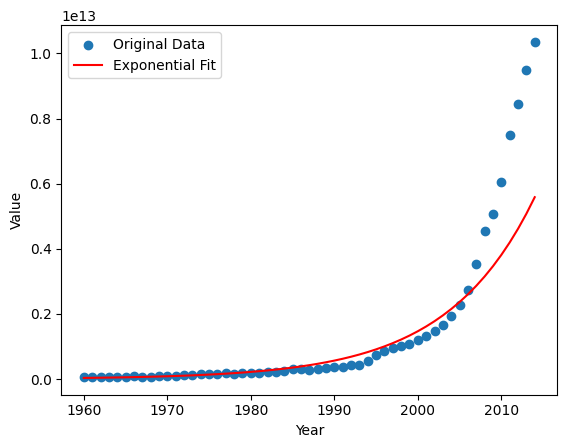

In [25]:
#Exponential
x_data = df['Year'].values
y_data = df['Value'].values

# Perform the exponential regression using polyfit
coefficients = np.polyfit(x_data, np.log(y_data), 1)
a_opt, b_opt = coefficients

# Generate the predicted values using the optimized parameters
y_fit = np.exp(a_opt * x_data + b_opt)

# Plot the original data and the exponential fit
plt.scatter(x_data, y_data, label='Original Data')
plt.plot(x_data, y_fit, label='Exponential Fit', color='red')
plt.xlabel('Year')
plt.ylabel('Value')
plt.legend()
plt.show()

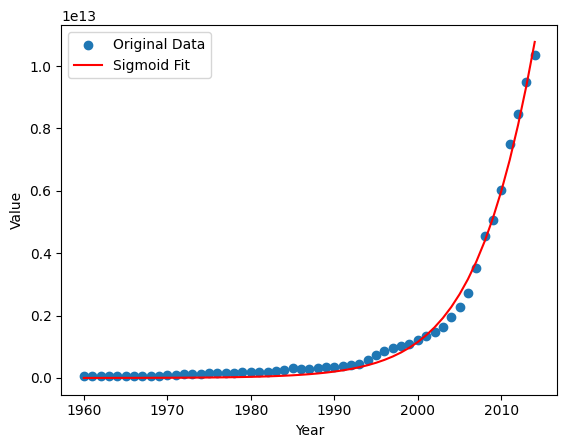

In [26]:
#Sigmoid
from scipy.optimize import curve_fit

def sigmoid_func(x, L, k, x0):
    return L / (1 + np.exp(-k * (x - x0)))

# Extract the x (Year) and y (Value) data from the DataFrame
x_data = df['Year'].values
y_data = df['Value'].values

# Perform the sigmoid regression using curve_fit
popt, pcov = curve_fit(sigmoid_func, x_data, y_data, p0=(max(y_data), 1, np.median(x_data)))

# Get the optimized parameters
L_opt, k_opt, x0_opt = popt

# Generate the predicted values using the optimized parameters
y_fit = sigmoid_func(x_data, L_opt, k_opt, x0_opt)

# Plot the original data and the sigmoid fit
plt.scatter(x_data, y_data, label='Original Data')
plt.plot(x_data, y_fit, label='Sigmoid Fit', color='red')
plt.xlabel('Year')
plt.ylabel('Value')
plt.legend()
plt.show()

### Class solution

In [27]:
def sigmoid(x, Beta_1, Beta_2):
     y = 1 / (1 + np.exp(-Beta_1*(x-Beta_2)))
     return y

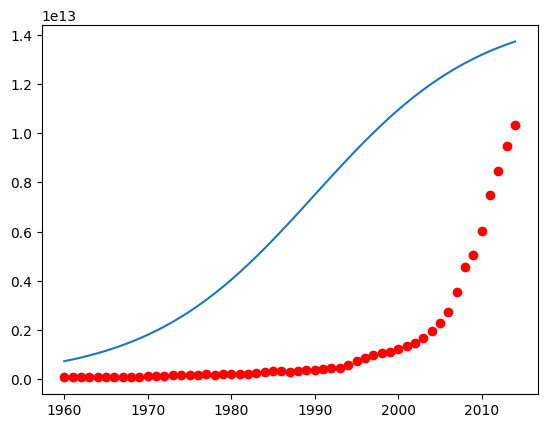

In [28]:
beta_1 = 0.10
beta_2 = 1990.0

#logistic function
Y_pred = sigmoid(x_data, beta_1 , beta_2)

#plot initial prediction against datapoints
plt.plot(x_data, Y_pred*15000000000000.)
plt.plot(x_data, y_data, 'ro')



In [29]:
# Normalize our data
xdata =x_data/max(x_data)
ydata =y_data/max(y_data)

In [30]:
from scipy.optimize import curve_fit
popt, pcov = curve_fit(sigmoid, xdata, ydata)
#print the final parameters
print(" beta_1 = %f, beta_2 = %f" % (popt[0], popt[1]))

 beta_1 = 690.451712, beta_2 = 0.997207


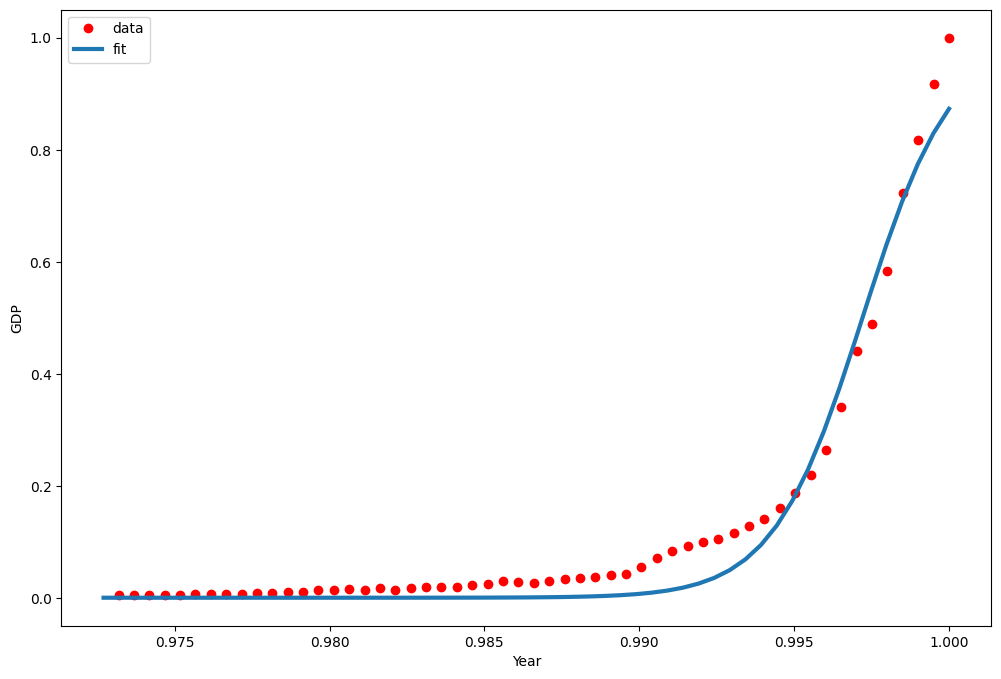

In [31]:
x = np.linspace(1960, 2015, 55)
x = x/max(x)
plt.figure(figsize=(12,8))
y = sigmoid(x, *popt)
plt.plot(xdata, ydata, 'ro', label='data')
plt.plot(x,y, linewidth=3.0, label='fit')
plt.legend(loc='best')
plt.ylabel('GDP')
plt.xlabel('Year')
plt.show()

In [32]:
# split data into train/test
msk = np.random.rand(len(df)) < 0.8
train_x = xdata[msk]
test_x = xdata[~msk]
train_y = ydata[msk]
test_y = ydata[~msk]

# build the model using train set
popt, pcov = curve_fit(sigmoid, train_x, train_y)

# predict using test set
y_hat = sigmoid(test_x, *popt)

# evaluation
print("Mean absolute error: %.2f" % np.mean(np.absolute(y_hat - test_y)))
print("Residual sum of squares (MSE): %.2f" % np.mean((y_hat - test_y) ** 2))
from sklearn.metrics import r2_score
print("R2-score: %.2f" % r2_score(test_y,y_hat) )

Mean absolute error: 0.03
Residual sum of squares (MSE): 0.00
R2-score: 0.98
